In [40]:
import pandas as pd
df=pd.DataFrame()

In [41]:
df = pd.read_csv('webDev5.csv',index_col='DATE',parse_dates=True)
pd.infer_freq

<function pandas.tseries.frequencies.infer_freq(index, warn: 'bool' = True) -> 'str | None'>

In [42]:
df.head()

,total_laid_off
DATE,
2020-03-19,36.0
2020-03-26,61.0
2020-03-28,75.0
2020-03-30,24.0
2020-04-01,13.0


<Axes: xlabel='DATE'>

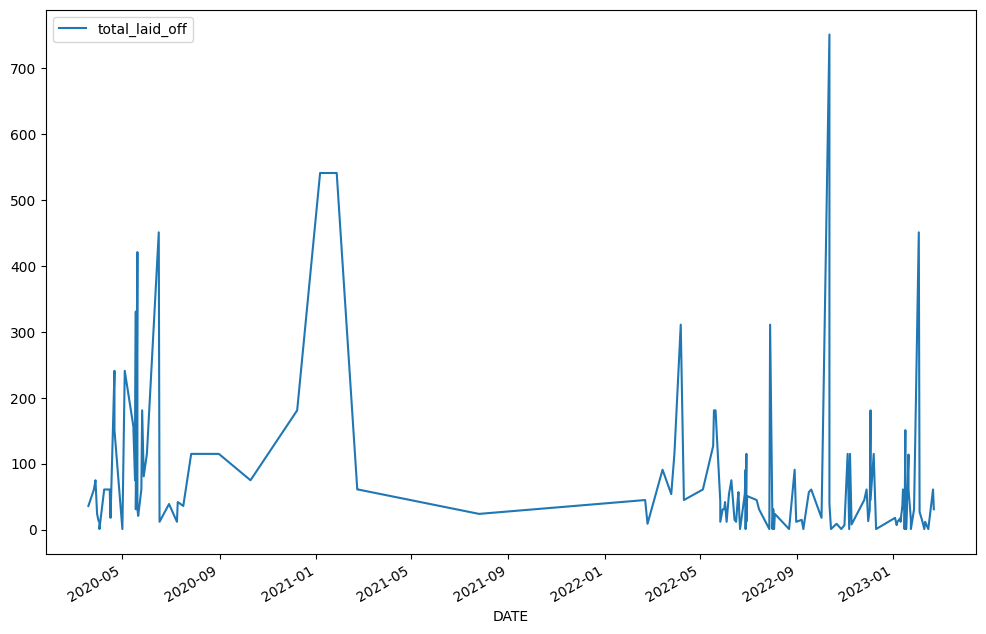

In [43]:
df.columns = ['total_laid_off']
df.plot(figsize=(12,8))

In [44]:
df['Sale_LastMonth']=df['total_laid_off'].shift(+1)
df['Sale_2Monthsback']=df['total_laid_off'].shift(+2)
df['Sale_3Monthsback']=df['total_laid_off'].shift(+3)
df

,total_laid_off,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
DATE,,,,
2020-03-19,36.0,NaN,NaN,NaN
2020-03-26,61.0,36.0,NaN,NaN
2020-03-28,75.0,61.0,36.0,NaN
2020-03-30,24.0,75.0,61.0,36.0
2020-04-01,13.0,24.0,75.0,61.0
...,...,...,...,...
2023-02-09,1.0,15.0,27.0,451.0
2023-02-10,12.0,1.0,15.0,27.0
2023-02-14,1.0,12.0,1.0,15.0


In [45]:
df=df.dropna()
df

,total_laid_off,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
DATE,,,,
2020-03-30,24.0,75.0,61.0,36.0
2020-04-01,13.0,24.0,75.0,61.0
2020-04-02,12.0,13.0,24.0,75.0
2020-04-02,1.8,12.0,13.0,24.0
2020-04-02,1.0,1.8,12.0,13.0
...,...,...,...,...
2023-02-09,1.0,15.0,27.0,451.0
2023-02-10,12.0,1.0,15.0,27.0
2023-02-14,1.0,12.0,1.0,15.0


In [46]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [47]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)


In [48]:
import numpy as np
x1,x2,x3,y=df['Sale_LastMonth'],df['Sale_2Monthsback'],df['Sale_3Monthsback'],df['total_laid_off']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[ 75.   61.   36. ]
 [ 24.   75.   61. ]
 [ 13.   24.   75. ]
 [ 12.   13.   24. ]
 [  1.8  12.   13. ]
 [  1.    1.8  12. ]
 [ 61.    1.    1.8]
 [ 61.   61.    1. ]
 [ 18.   61.   61. ]
 [ 61.   18.   61. ]
 [241.   61.   18. ]
 [151.  241.   61. ]
 [  1.  151.  241. ]
 [241.    1.  151. ]
 [156.  241.    1. ]
 [151.  156.  241. ]
 [ 75.  151.  156. ]
 [331.   75.  151. ]
 [ 31.  331.   75. ]
 [135.   31.  331. ]
 [421.  135.   31. ]
 [ 31.3 421.  135. ]
 [ 21.   31.3 421. ]
 [ 61.   21.   31.3]
 [181.   61.   21. ]
 [ 81.  181.   61. ]
 [115.   81.  181. ]
 [451.  115.   81. ]
 [ 12.  451.  115. ]
 [ 39.   12.  451. ]
 [ 12.   39.   12. ]
 [ 42.   12.   39. ]
 [ 36.   42.   12. ]
 [115.   36.   42. ]
 [115.  115.   36. ]
 [ 75.  115.  115. ]
 [181.   75.  115. ]
 [541.  181.   75. ]
 [541.  541.  181. ]
 [ 61.  541.  541. ]
 [ 61.   61.  541. ]
 [ 24.   61.   61. ]
 [ 45.   24.   61. ]
 [  9.   45.   24. ]
 [ 91.    9.   45. ]
 [ 54.   91.    9. ]
 [115.   54.   91. ]
 [311.  115. 

In [49]:
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

In [69]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

C:\Users\white\AppData\Local\Temp\ipykernel_15660\1977262272.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


LinearRegression()

['2020-03-19', '2020-03-26', '2020-03-28', '2020-03-30', '2020-04-01', '2020-04-02', '2020-04-02', '2020-04-02', '2020-04-08', '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-21', '2020-04-21', '2020-05-01', '2020-05-04', '2020-05-15', '2020-05-15', '2020-05-17', '2020-05-18', '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-20', '2020-05-21', '2020-05-25', '2020-05-26', '2020-05-28', '2020-06-01', '2020-06-16', '2020-06-17', '2020-06-29', '2020-07-09', '2020-07-10', '2020-07-17', '2020-07-27', '2020-08-31', '2020-10-10', '2020-12-08', '2021-01-06', '2021-01-27', '2021-02-22', '2021-02-23', '2021-07-26', '2022-02-21', '2022-02-24', '2022-03-15', '2022-03-26', '2022-03-30', '2022-04-07', '2022-04-11', '2022-05-05', '2022-05-18', '2022-05-19', '2022-05-21', '2022-05-27', '2022-05-27', '2022-05-30', '2022-06-01', '2022-06-02', '2022-06-04', '2022-06-07', '2022-06-10', '2022-06-14', '2022-06-16', '2022-06-18', '2022-06-19', '2022-06-20', '2022-06-21', '2022-06-27', '2022-06-28', '2022

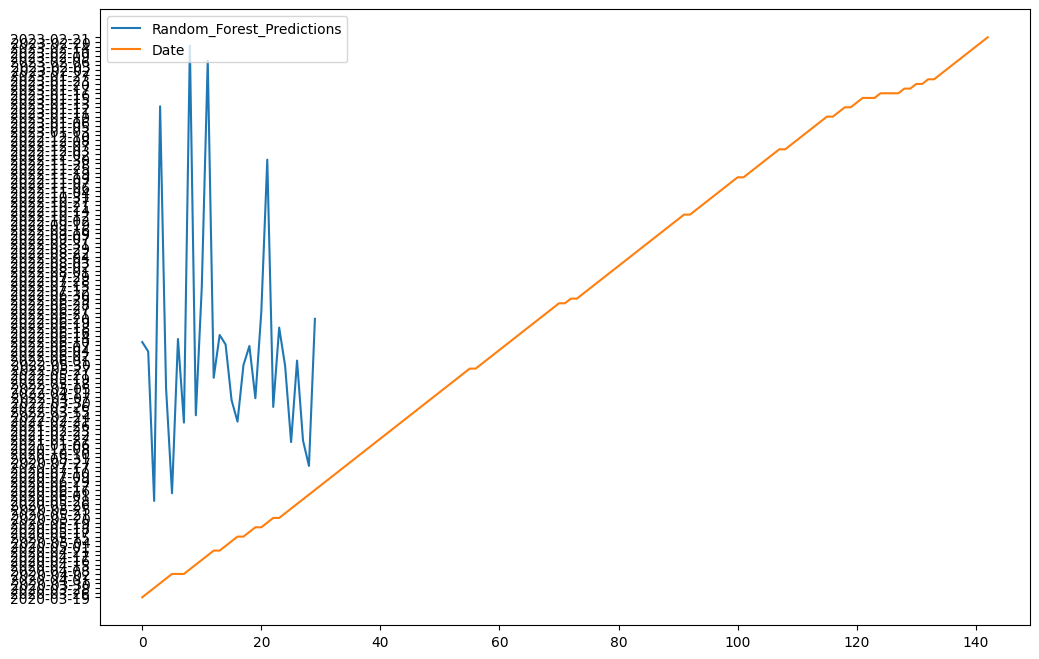

In [95]:
fd=pd.DataFrame()
fd =pd.read_csv('webDev5.csv')
pred=model.predict(X_test)
functiong=plt.figure()
# area=np.array(df)
c=fd.DATE.tolist()
print(c)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
# plt.plot(y_test,label='Actual Sales')
# plt.plot(c,pred)
plt.plot(c,label='pred')
plt.legend(loc="upper left")
plt.show()

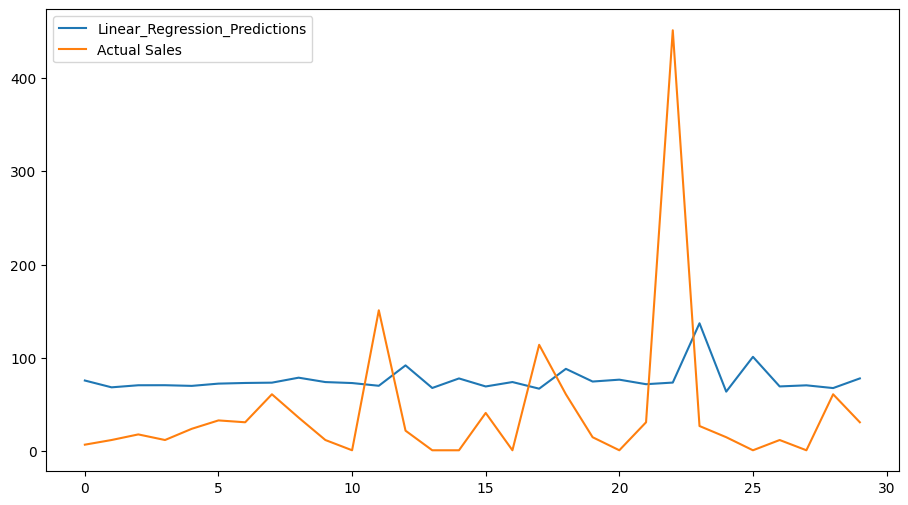

In [ ]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [ ]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 1913.7762399350665
Mean Squared Error for Linear Regression Model is: 1791.4965232759832
